# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# [教學目標]

- 以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形

- 分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受

- 順便熟悉 matplotlib 的幾種繪圖設定

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')
dir_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

In [3]:
f_app = os.path.join(dir_path,'application_train.csv')
print(f'Path of read: {f_app}')
app_train = pd.read_csv(f_app)
app_train.head()

Path of read: C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

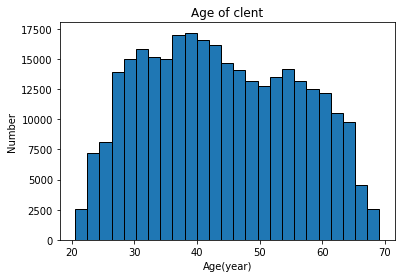

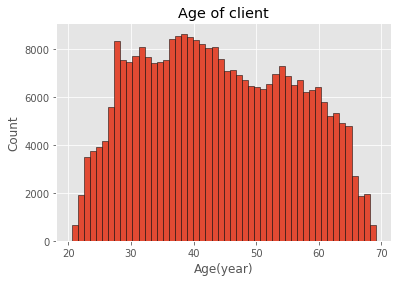

In [5]:
#以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25 )
plt.title('Age of clent') ; plt.xlabel('Age(year)') ; plt.ylabel('Number')
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot')

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 50)
plt.title('Age of client') ; plt.xlabel('Age(year)') ; plt.ylabel('Count')
plt.show()

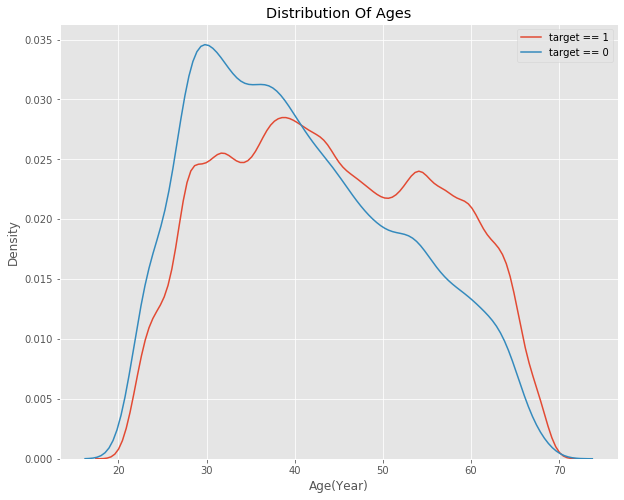

In [6]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10,8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0,'DAYS_BIRTH'] / 365 ,label = 'target == 1')

# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1,'DAYS_BIRTH'] / 365,label = 'target == 0')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age(Year)'),plt.ylabel('Density'),plt.title('Distribution Of Ages')

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()


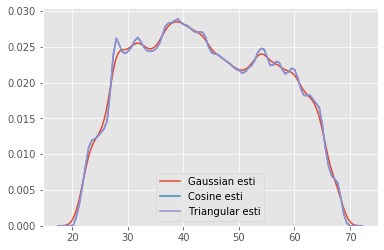

In [7]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365 , label = 'Gaussian esti', kernel = 'gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0,'DAYS_BIRTH'] / 365 , label = 'Cosine esti', kernel = 'cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0 ,'DAYS_BIRTH'] / 365,label = 'Triangular esti', kernel = 'tri')

plt.show()

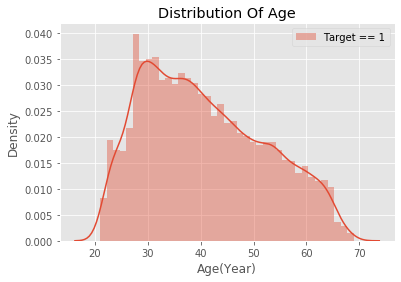

In [8]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target == 1')
plt.legend()
plt.title('Distribution Of Age');plt.xlabel('Age(Year)');plt.ylabel('Density')
plt.show()

## It's your turn
## 除了直接觀察變項以外，我們也可以分群比較
自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)

以年齡區間為 x, target 為 y 繪製 barplot

In [9]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [10]:
age_data = app_train[['DAYS_BIRTH','TARGET']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
print(age_data['YEARS_BIRTH'])

bin_cut = np.arange(20,70.0000000001,5)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)
#顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: YEARS_BIRTH, Length: 307511, dtype: float64
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


In [125]:
# 繪圖前先排序 / 分
print(age_data.head())
years_group = age_data['YEARS_BINNED'].unique()
sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == years_group[1])  \
                            & (age_data['TARGET'] == 0) ,age_data['YEARS_BIRTH']], label = str(years_group[1]) )
                            

   DAYS_BIRTH  TARGET  YEARS_BIRTH  YEARS_BINNED
0        9461       1    25.920548  (20.0, 25.0]
1       16765       0    45.931507  (20.0, 25.0]
2       19046       0    52.180822  (20.0, 25.0]
3       19005       0    52.068493  (20.0, 25.0]
4       19932       0    54.608219  (20.0, 25.0]


KeyError: "None of [Float64Index([ 25.92054794520548,  45.93150684931507,  52.18082191780822,\n               52.06849315068493, 54.608219178082194, 46.413698630136984,\n               37.74794520547945,  51.64383561643836,  55.06575342465754,\n               39.64109589041096,\n              ...\n               35.50958904109589,  44.00821917808219,  32.52054794520548,\n               45.76712328767123,   66.8054794520548, 25.553424657534247,\n              56.917808219178085,   41.0027397260274,  32.76986301369863,\n               46.18082191780822],\n             dtype='float64', length=307511)] are in the [columns]"

In [82]:
years_group = list(str(sorted(age_data['YEARS_BINNED'].value_counts().index)))
for i in years_group:
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == years_group[i])  \
                            & (age_data['TARGET'] == 0) ,age_data['YEARS_BIRTH']], label = str(years_group[i]) )
                            

[(Interval(45.0, 50.0, closed='right'),), (Interval(50.0, 55.0, closed='right'),), (Interval(35.0, 40.0, closed='right'),), (Interval(55.0, 60.0, closed='right'),), (Interval(20.0, 25.0, closed='right'),), (Interval(30.0, 35.0, closed='right'),), (Interval(40.0, 45.0, closed='right'),), (Interval(65.0, 70.0, closed='right'),), (Interval(60.0, 65.0, closed='right'),)]


In [23]:
print(age_data['YEARS_BINNED'] == '(Interval(50.0, 55.0, closed='right'),)')

SyntaxError: invalid syntax (<ipython-input-23-4616bed5dcb4>, line 1)

SyntaxError: invalid syntax (<ipython-input-21-ac488143e3a8>, line 1)